### General rules:
 * For all figures that you generate, remember to add meaningful labels to the axes, and make a legend, if applicable.
 * Do not hard code constants, like number of samples, number of channels, etc in your program. These values should always be determined from the given data. This way, you can easily use the code to analyse other data sets.
 * Do not use high-level functions from toolboxes like scikit-learn.
 * Replace *Template* by your *FirstnameLastname* in the filename, or by *Lastname1Lastname2* if you work in pairs.

# BCI-IL - Exercise Sheet #05

#### Name

In [28]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

## Preparation: Load data

In [29]:
fname= 'eyes_closed_VPal.npz'
cnt, fs, clab, mnt = bci.load_data(fname)

## Exercise 1: PCA on raw data  (3 points) 
Make a scatter plot of the data with the two directions of largest variance as coordinate axes. Then, depcit the projection vectors of those two components as scalp maps (function `scalpmap` provided in the `bbci_minitoolbox`).

(118, 2)
(5958, 2)


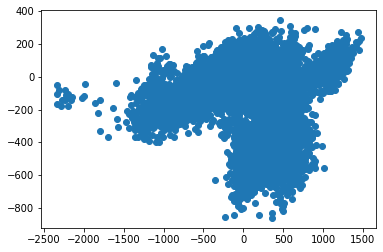

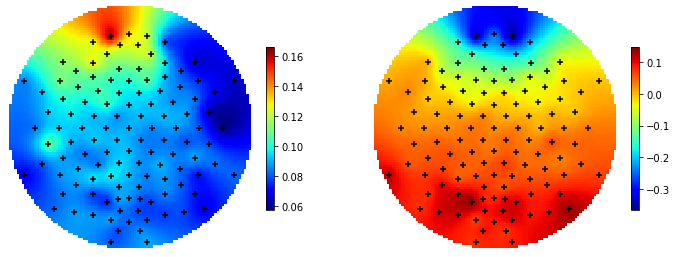

In [96]:
X = cnt

# print (np.shape(X))    # 118 channels and 5958 time points for each

# print (np.size(clab))

# A = [clab.index(x) for x in clab]     # array of all indices 

# plt.scatter(A,X[A])

# [plt.scatter(clab.index(x),X[clab.index(x)]) for x in clab]

M = np.mean(X)    # Array of means of all the signals in the channels 

# print (M)

C = X - M         # Make it Zero Mean data

X_std = C/np.std(X_std)

V = np.cov(X)

eig_vals, eig_vecs = np.linalg.eigh(V)


# Make a list of eigen tuples ( value, vectors )
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort the tuples from high to low
eig_pairs.sort(key = lambda x:x[0], reverse=True )

matrix_w = np.hstack((eig_pairs[0][1].reshape(len(eig_vecs),1),eig_pairs[1][1].reshape(len(eig_vecs),1)))

# print (np.shape(eig_vecs[:,-1].reshape(118,1)))

# matrix_w = np.hstack((eig_vecs[:,-1].reshape(len(eig_vecs),1),eig_vecs[:,-2].reshape(len(eig_vecs),1)))

print ( np.shape(matrix_w) )    # for 118 channels, two principal components

Y = X_std.T.dot(matrix_w)

print(np.shape(Y))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y[:,0],Y[:,1])
# ax.xlabel('Principal Component 1')
# ax.ylabel('Principal Component 2')


plt.figure(figsize = (12,6))
plt.subplot(121)
bci.scalpmap(mnt,eig_vecs[:,-1])
plt.subplot(122)
bci.scalpmap(mnt,eig_vecs[:,-2])


# plt.subplot(212)
# bci.scalpmap(mnt, eig_vecs[:,-1])
# bci.scalpmap(mnt, eig_vecs[:,-2])

# print (np.shape(Y))

# plt.subplot(211).scatter(Y[:,0],Y[:,1])

# plt.subplot(212)
# bci.scalpmap(mnt,eig_vecs[:,-1])
# bci.scalpmap(mnt,eig_vecs[:,-2])

## Exercise 2: Artifact to signal ratio with PCA  (5 points)
For this task we assume that the two components from Ex. \#01 reflect eye movements, while all other components do not contain artifacts from eye movement. If you did not succeed with Ex. \#01, chose an arbitrary component.

Determine for each channel which proportion of the overall variance is caused by eye movements and plot this information as a scalp map. Also, calculate the Signal-To-Noise ratio (SNR) per channel in Decibel (dB).

(118, 5958)


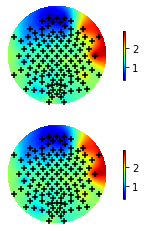

In [75]:
# We have Y which is basically modelling the contribution of the 118 channels as two channels for 5958 time points
# Thus, the eye movements are basically propagated from two eyes as these channels and the time series can be obtained
# by the transpose of Y 

A = Y.T     # Two sources and their time series 
eye_1 = A[0,:]
eye_2 = A[1,:]

# Each channel produces a time series. The variance in each point from the mean is caused due to  
# various factors, out of which we assume one is eye movement. Hence, If a time point varies by k units
# and we know that the eye movement generates a signal that varies by x units form the same mean, then we can safely 
# say that the impact of eye movement on the total variance of the channel at that time point in x/k units. 
# This needs to be done for all channels and for both eyes


X_var = np.var(X_std, axis=1)         # X_stnadardized is passed because it 

X_mean = np.mean(X_std, axis=1)       # means of all channels

# C = X - X_mean                   # Zero center the X values

# print ( X_mean )

# print(np.shape(X))

eye_1_std = (eye_1 - np.mean(eye_1))/np.std(eye_1)
eye_2_std = (eye_2 - np.mean(eye_2))/np.std(eye_2)

eye_1_var = np.var(eye_1_std)           # standardize the eye series variables
eye_2_var = np.var(eye_2_std)           

# print (eye_1_var/X_var[0])

# Since the variables have been standardized, the means come nearly about 0 for both variables, and hence,
# the variances of the standardized variables would be about the same origin approx. Hence, np.var() should work

eye_1_contrib = eye_1_var/X_var
eye_2_contrib = eye_2_var/X_var


plt.subplot(211)
bci.scalpmap(mnt,eye_1_contrib)

plt.subplot(212)
bci.scalpmap(mnt,eye_2_contrib)


# The Signal in this context is the eye signal. The rest of the variation of the channel will be the noise. 
# Hence, the SNR should be Log(eye_signal/channel_signal - eye_signal)

eye_signal = eye_1_std + eye_2_std 
noise = X_std - eye_signal             # rest of the signal 

SNR = np.abs(eye_signal/noise)

SNR_DB = np.log10(SNR)

print(np.shape(SNR_DB))



## Preparation: Load data

In [ ]:
fname = 'erp_hexVPsag.npz'
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)

## Exercise 3: Artificial EEG data  (7 points)
Generate one trial of artificial, stereotypical EEG data (1000 ms, 55 channels) out of the data set of sheet #01. The
trial should contain a 'clean' target ERP composed of an N2 component (the one negatively peaking at 310 ms in the data on sheet #01) and a P3 component (the one peaking at 380 ms in the data on sheet #01). Both components should have their typical spatial distribution. To this extent, extract the corresponding scalp patterns at the peaks of the average ERPs, calculate the filters, use them to isolate the components from the average ERP and then project them back into the EEG space.
Plot the artificial EEG (the backprojected ERP) in channels PO7 and Cz and the scalp patterns correpsonding to the N2 and P3.

7.632550367345823e-17